In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['figure.dpi'] = 200

In [2]:
p_air = 1000 #mbar ambient air pressure in capillary

#capillary
p_rec1 = np.array([1e-5, 3.3e-5, 1e-4, 3.3e-4, 1e-3, 3.3e-3]) #pressure in recipient 
vol_cap = (np.array([0.78, 0.90, 1.50, 1.60, 1.80, 1.90])-np.array([0.68, 0.70, 1.30, 1.30, 0.80, 0.90]))/1000 #(position 1- position 2)*capillary size in liter
#pumped volume in recipient: Boyle-Mariotte law
vol_rec1 = vol_cap*p_air /p_rec1
t_cap = np.array([338, 86, 25, 9.8, 12.2, 4])
S_cap = vol_rec1/t_cap

#piston
p_rec2 = np.array([3.3e-4, 1e-3, 3.3e-3, 1e-2, 3.3e-2, 1e-1])
vol_pis = (np.array([12.5, 24.5, 15.0, 25.0, 25.0, 23.0])-np.array([7.5, 19.5, 10.0, 20.0, 20.0, 18.0]))/1000 #Volume in piston in liter
vol_rec2 = vol_pis*p_air/p_rec2
t_pis = np.array([91,49,18.2, 7, 3, 1.34])
S_pis = vol_rec2/t_pis

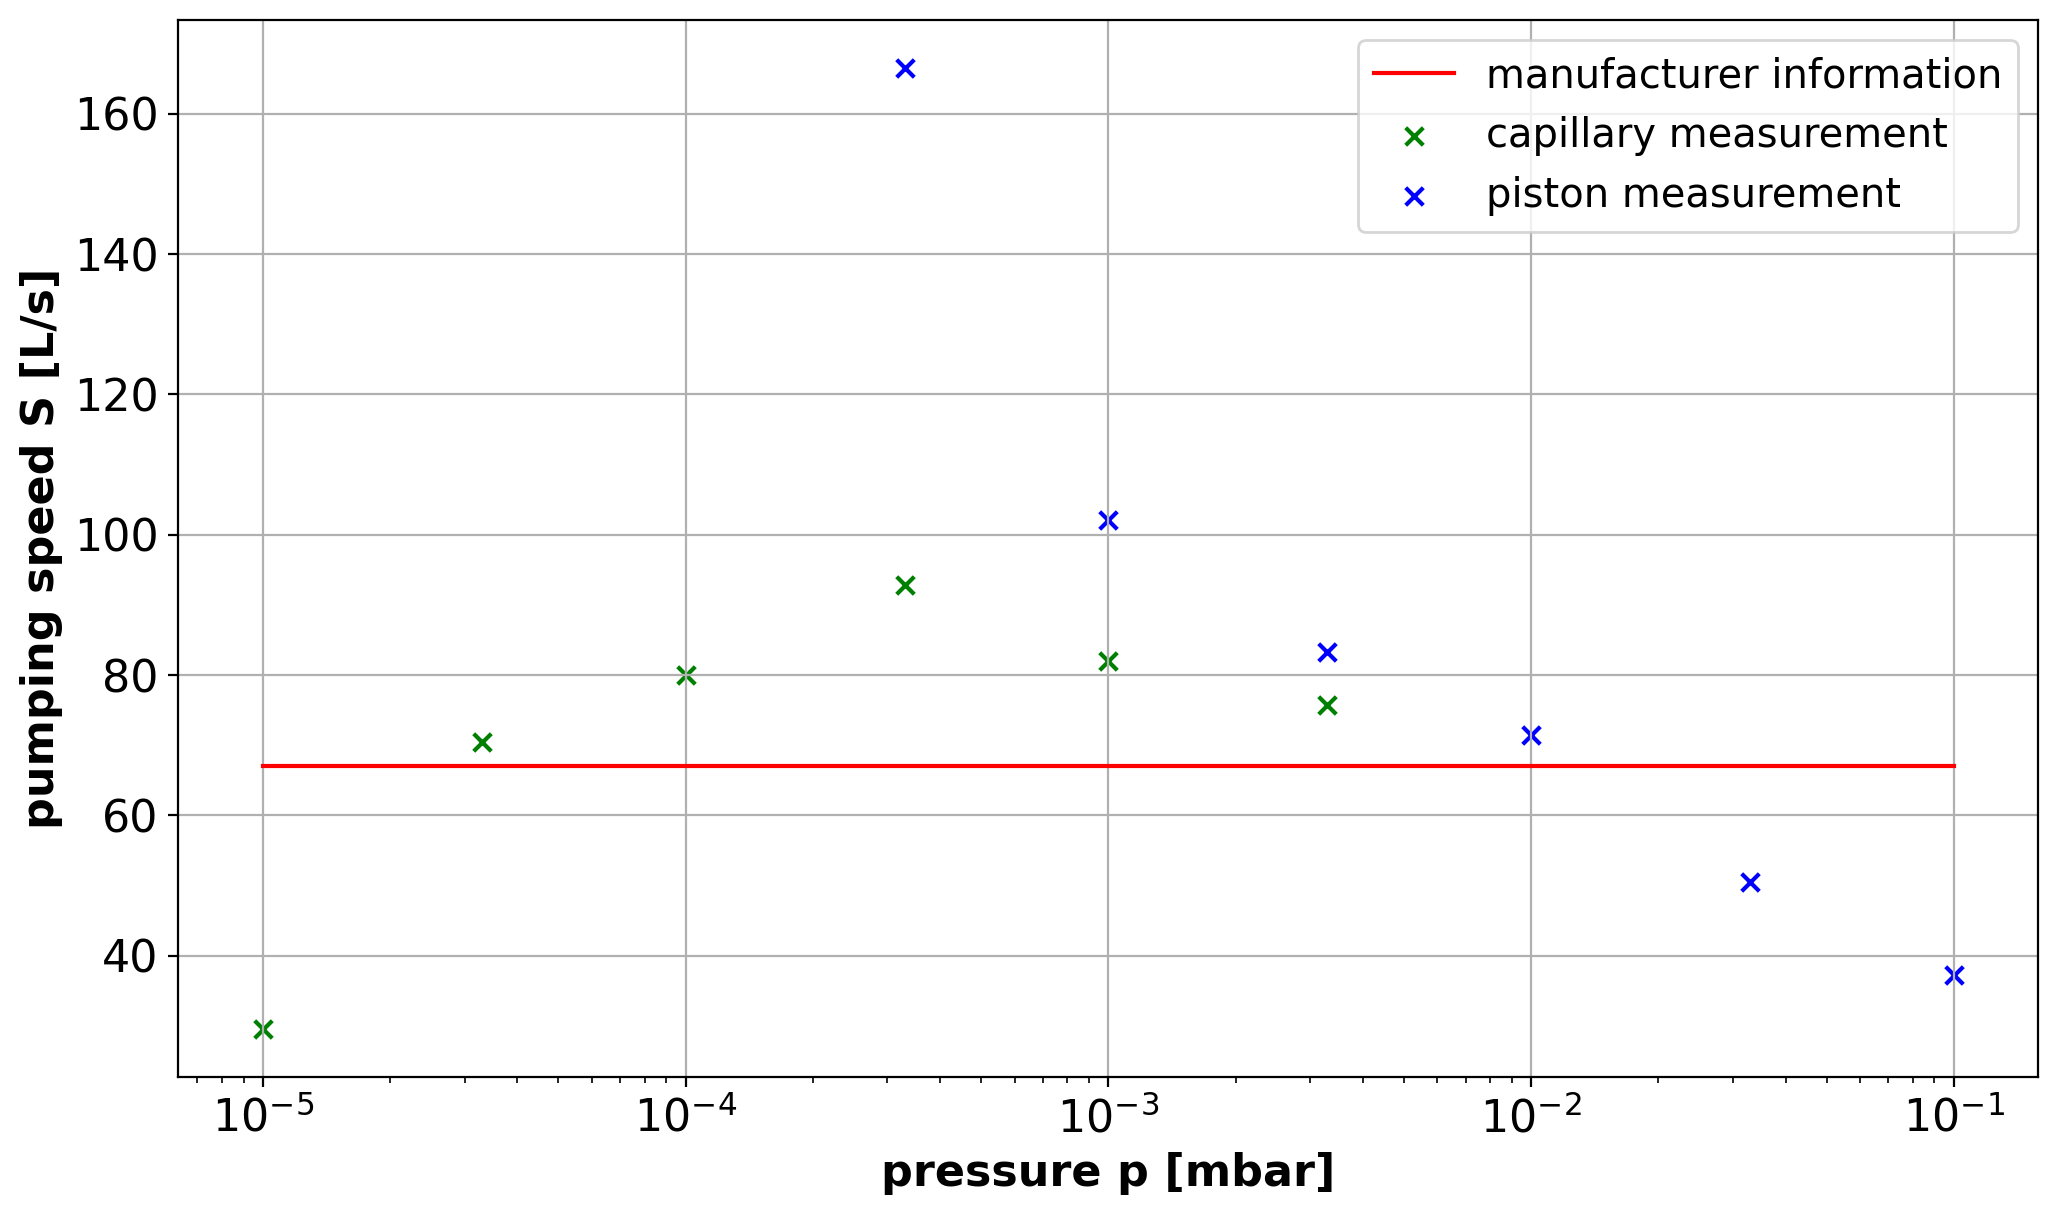

In [3]:
plt.figure(figsize=(12,7))

plt.scatter(p_rec1, S_cap, label="capillary measurement", marker="x", s=40, color = 'green')
plt.scatter(p_rec2, S_pis, label="piston measurement", marker="x", s=40, color = 'blue')
plt.plot([1e-5,1e-1], [67, 67], color = 'red', label = 'manufacturer information')

plt.legend(fontsize="x-large")
plt.grid(True)
#plt.title('Pumping speed TMP in dependancy of the chamber pressure')
plt.xlabel('pressure p [mbar]')
plt.ylabel('pumping speed S [L/s]')
plt.xscale('log')
#plt.yscale('log')

plt.savefig("pumping_speed.png")

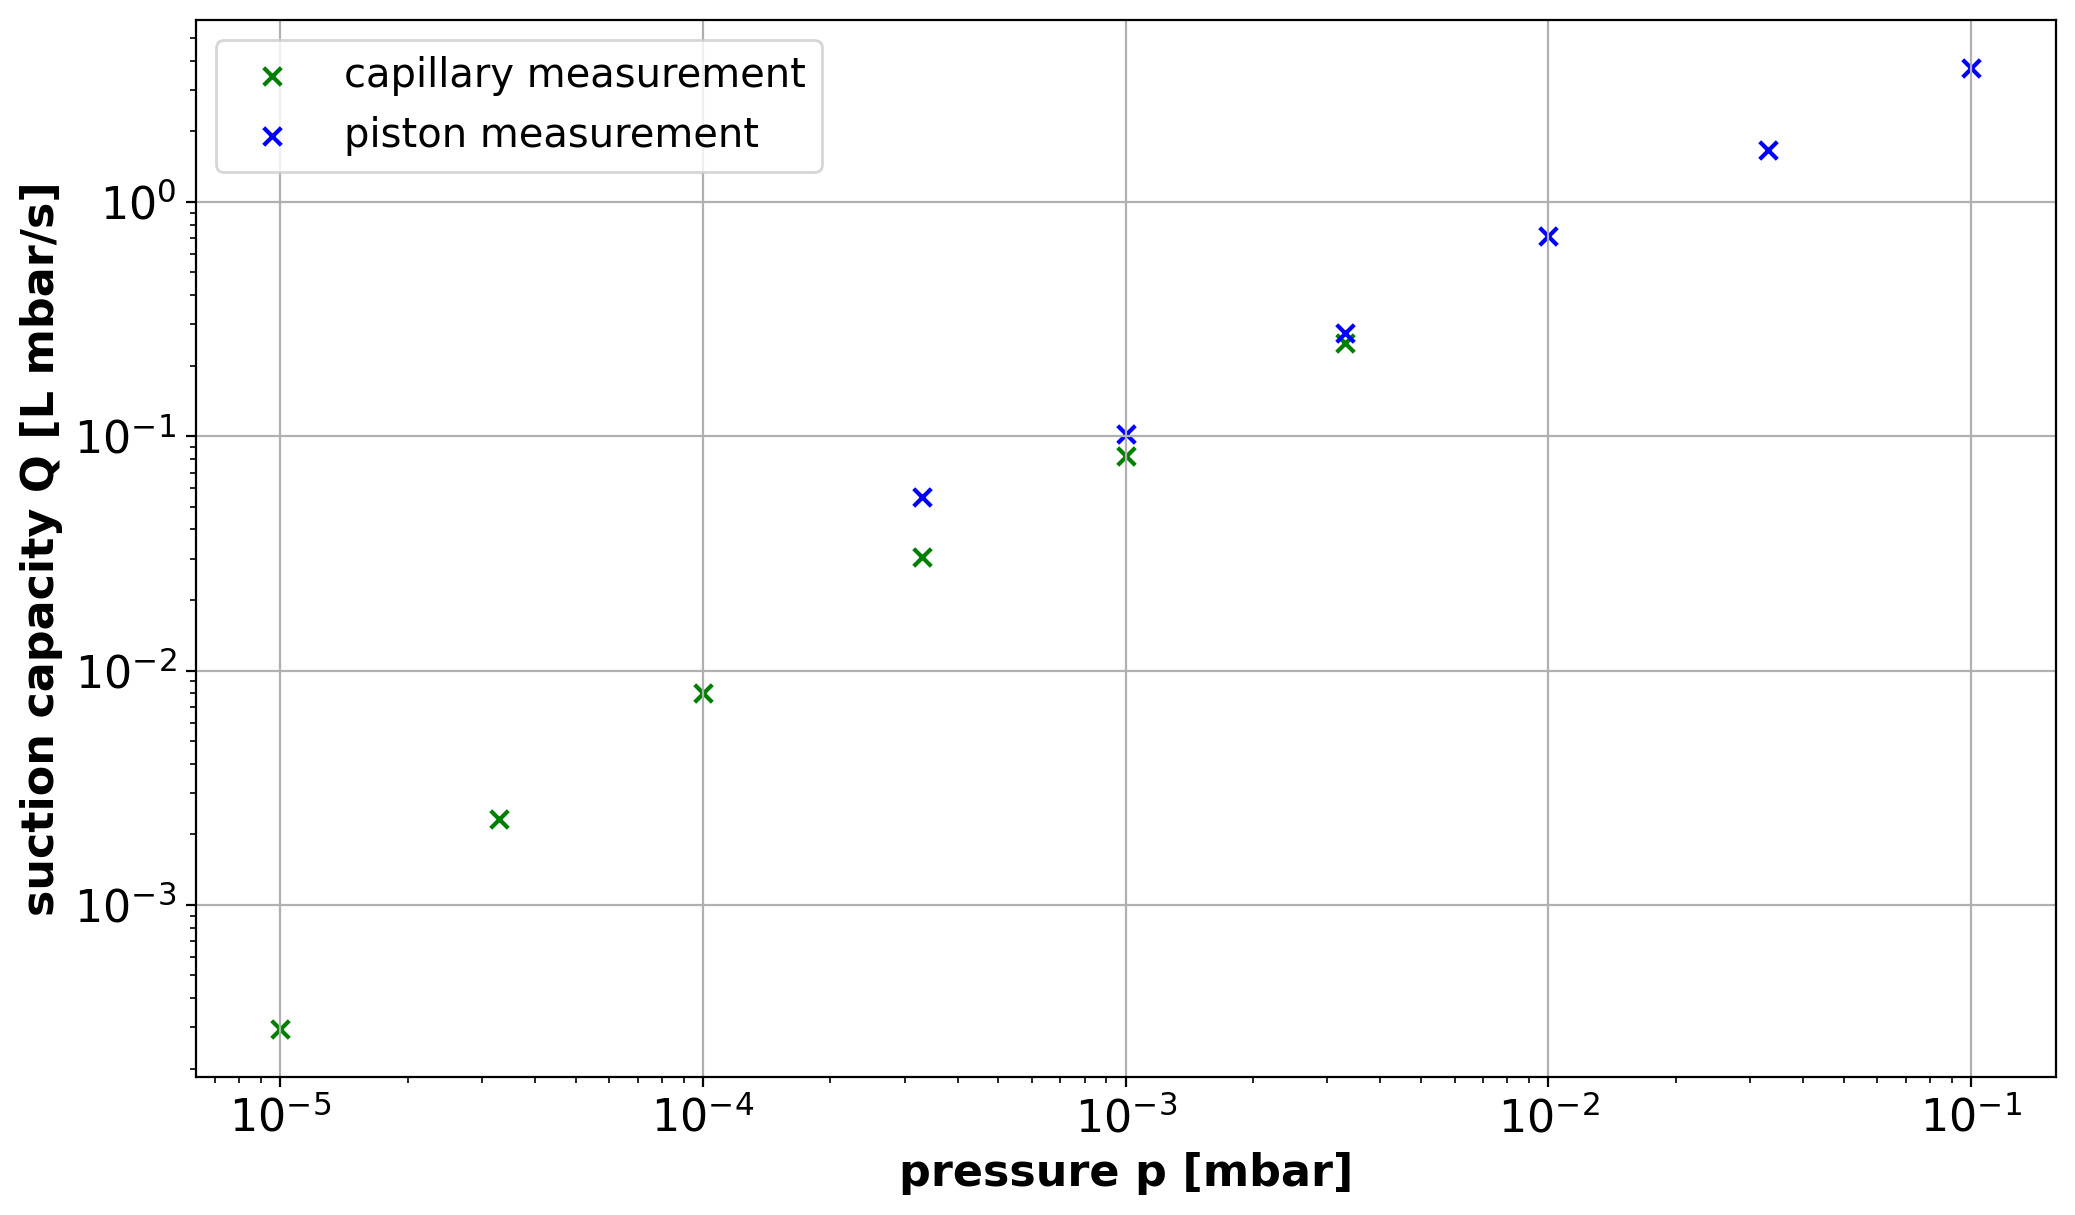

In [4]:
plt.figure(figsize=(12,7))

plt.scatter(p_rec1, S_cap*p_rec1, label="capillary measurement", marker="x", s=40, color = 'green')
plt.scatter(p_rec2, S_pis*p_rec2, label="piston measurement", marker="x", s=40, color = 'blue')


plt.legend(fontsize="x-large")
plt.grid(True)
#plt.title('Pumping speed TMP in dependancy of the chamber pressure')
plt.xlabel('pressure p [mbar]')
plt.ylabel('suction capacity Q [L mbar/s]')
plt.xscale('log')
plt.yscale('log')

plt.savefig("suction_capacity.png")

In [5]:
#average S in constant intervall
S_mean = np.mean(np.concatenate((S_cap[1:],S_pis[2:4])))
S_mean_sig = np.std(np.concatenate((S_cap[1:],S_pis[2:4])),ddof=1)
print("Mean Value for the constant intervall:",S_mean,'+-',S_mean_sig)

Mean Value for the constant intervall: 79.37714078929544 +- 7.712477671596341


In [6]:
print(p_rec1[0]) 
print(S_cap[0])

1e-05
29.585798816568037


In [8]:
#conductance of the pipe
p1_pipe= np.array([1.2e-5, 3.6e-5, 1.1e-4, 3.6e-4,1.1e-3, 1.6e-3,  3.7e-3, 1.1e-2, 3.6e-2, 1.1e-1]) #mbar
p2_pipe = np.array([1.4e-3, 4.3e-3, 1.6e-2, 3.9e-2,9.0e-2,1.1e-1,  1.8e-1, 2.9e-1, 4.4e-1, 7.2e-1]) #mbar
L_exp1 = S_mean*p1_pipe[:7]/(p2_pipe[:7]-p1_pipe[:7]) #with p1 = pressure in recipient, p2 pressure at the other end of the pipe/aperture
L_exp2 = S_pis[3:]*p1_pipe[7:]/(p2_pipe[7:]-p1_pipe[7:]) # reduced S for pressure above 0.01mbar
L_exp_pipe = np.concatenate((L_exp1,L_exp2))

#theoretical L: viscous flow
l = 1 # length in m
d = 0.016 # diameter in m
eta = 1.83e-7 #viscosity of air in mbar*s, at 20°C
p_mean_pipe = (p1_pipe+p2_pipe)/2
L_theo_vis = np.pi/8*(d/2)**4*p_mean_pipe/eta/l/const.liter

#theoretical L: molecular flow
R = const.R
M_air =0.029 #kg/mol
T = 20 + const.zero_Celsius # Kelvin
L_theo_molec = 8/3 * (d/2)**3/l * np.sqrt((np.pi*R*T)/(2*M_air))/const.liter*np.ones(len(p1_pipe))

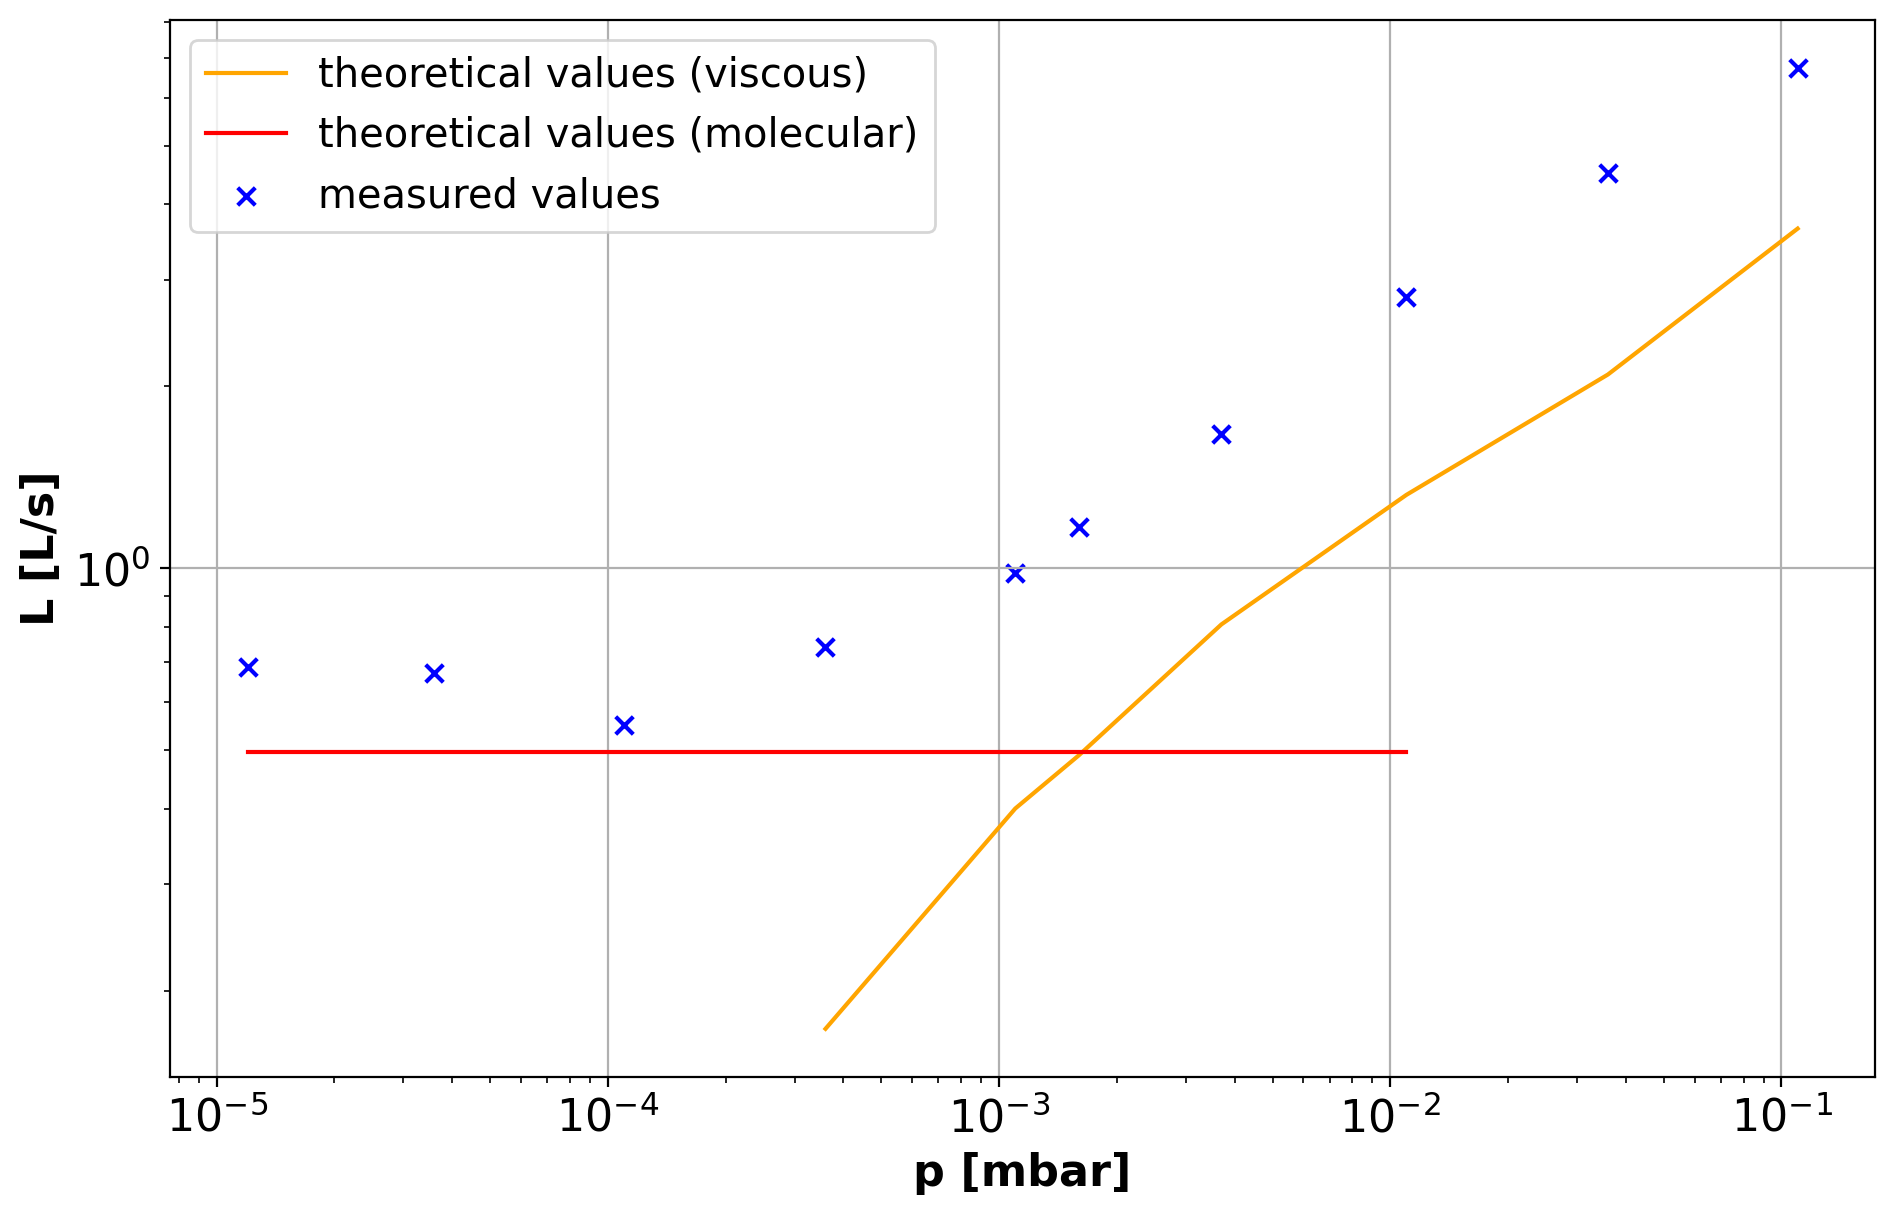

In [40]:
plt.figure(figsize=(11,7))
plt.scatter(p1_pipe, L_exp_pipe, s=40, label="measured values", marker="x", color='blue')
plt.plot(p1_pipe[3:], L_theo_vis[3:], label="theoretical values (viscous)", color = 'orange')
plt.plot(p1_pipe[:8], L_theo_molec[:8],label="theoretical values (molecular)", color = 'red')
plt.legend(fontsize='x-large')
plt.grid(True)
#plt.title('Conductance of the pipe in dependancy of the chamber pressure')
plt.xlabel('p [mbar]')
plt.ylabel('L [L/s]')
plt.xscale('log')
plt.yscale('log')

plt.savefig('tube.png')

In [27]:
#conductance of the aperture
p1_aper = np.array([2.1e-5, 2e-5, 1.9e-5, 2e-5, 2.9e-5, 5.4e-5, 1.3e-4, 4.6e-4, 1.8e-3, 6.9e-3, 3.1e-2, 2.8e-1 ])
p2_aper = np.array([6.7e-5, 7e-5, 1.1e-4, 3.2e-4, 1.1e-3, 3.2e-3, 1e-2, 3.5e-2, 1e-1, 3.3e-1, 1.0, 3.4 ])
L_exp1 = S_mean*p1_aper[:10]/(p2_aper[:10]-p1_aper[:10]) #with p1 = pressure in recipient, p2 pressure at the other end of the pipe/aperture
L_exp2 = S_pis[4:]*p1_aper[10:]/(p2_aper[10:]-p1_aper[10:]) # reduced S for pressure above 0.01mbar
L_exp_aper = np.concatenate((L_exp1,L_exp2))

#theoretical value for the aperture
d_aper= 0.004 #m
mu = np.sqrt((8*R*T)/(np.pi*M_air))
L_theo_aper=np.ones(len(L_exp_aper))*np.pi*mu/4*(d_aper/2)**2/const.liter

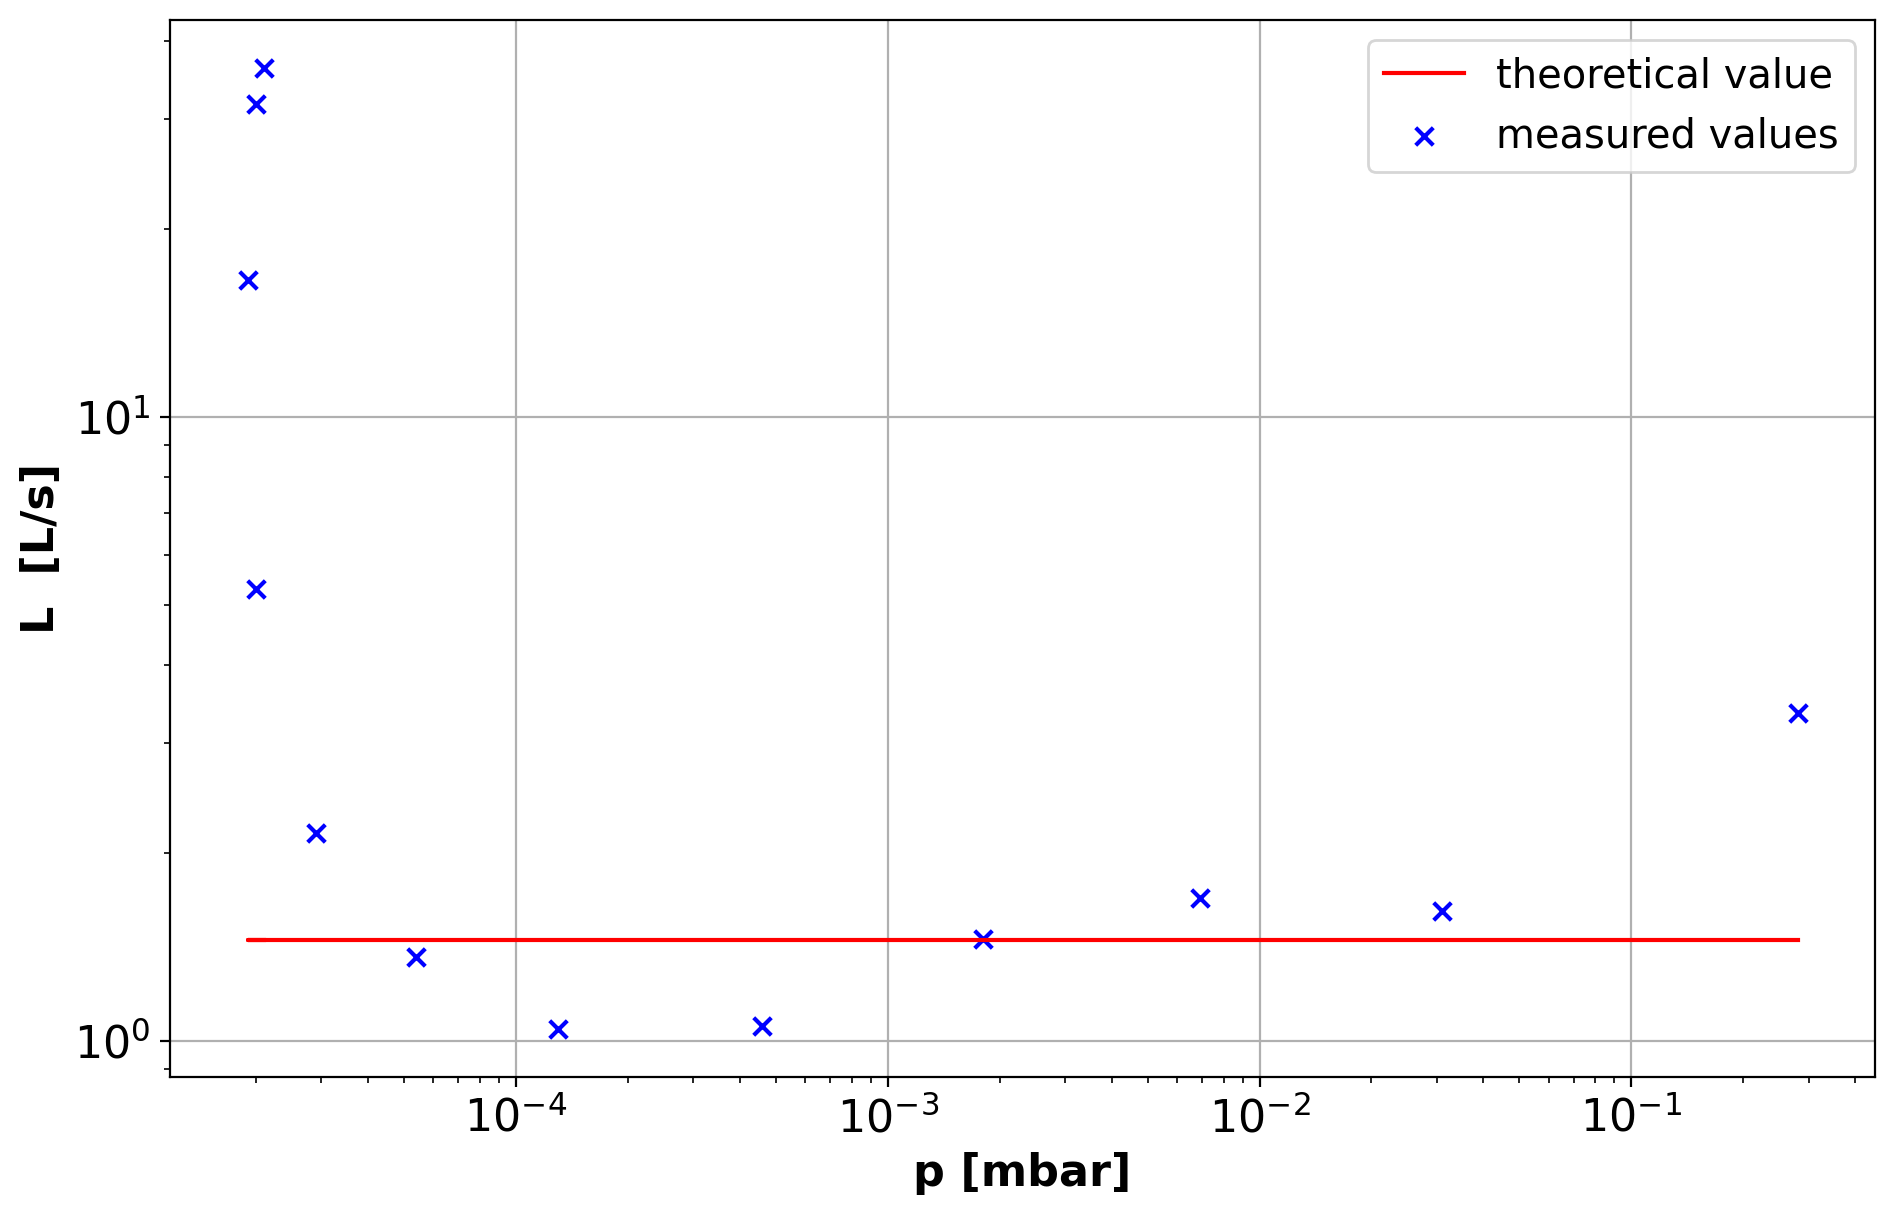

In [37]:
plt.figure(figsize=(11,7))
plt.scatter(p1_aper, L_exp_aper, label="measured values", s = 40, marker="x", color = 'blue')
plt.plot(p1_aper, L_theo_aper, label="theoretical value", color = 'red')
plt.legend(fontsize='x-large')
plt.grid(True)
#plt.title('Conductance of the aperture in dependancy of the chamber pressure')
plt.xlabel('p [mbar]')
plt.ylabel('L  [L/s]')
plt.xscale('log')
plt.yscale('log')

plt.savefig('orifice.png')

In [32]:
#conductance of pipe and aperture
p1_both = np.array([1.6e-5, 1.9e-5, 3.5e-5, 1e-4, 3.7e-4, 1.2e-3, 3.3e-3,1e-2, 3.5e-2, 1.4e-1])
p2_both = np.array([1.5e-4, 1.1e-3, 5.3e-3, 2.2e-2, 6e-2, 1.3e-1, 2.7e-1, 5.5e-1, 1.1, 2.5 ])
L_exp1 = S_mean*p1_both[:7]/(p2_both[:7]-p1_both[:7])
L_exp2 = S_pis[3:]*p1_both[7:]/(p2_both[7:]-p1_both[7:])
L_exp_both = np.concatenate((L_exp1, L_exp2))

In [33]:
#Choosing which values of L_exp_pipe and L-exp_aperture can be added together
pipe_mask=[False, True, True, True, True, False, False, True, True, False]
aper_mask=[False, False,False, False, True,False, True, True, True, True, True, False]
print(p1_pipe)
print(p1_aper)
print(p1_pipe[pipe_mask])
print(p1_aper[aper_mask])

L_theo_both = 1/(1/L_exp_pipe[pipe_mask] + 1/L_exp_aper[aper_mask])
p_theo = (p1_pipe[pipe_mask] + p1_aper[aper_mask])/2

[1.2e-05 3.6e-05 1.1e-04 3.6e-04 1.1e-03 1.6e-03 3.7e-03 1.1e-02 3.6e-02
 1.1e-01]
[2.1e-05 2.0e-05 1.9e-05 2.0e-05 2.9e-05 5.4e-05 1.3e-04 4.6e-04 1.8e-03
 6.9e-03 3.1e-02 2.8e-01]
[3.6e-05 1.1e-04 3.6e-04 1.1e-03 1.1e-02 3.6e-02]
[2.9e-05 1.3e-04 4.6e-04 1.8e-03 6.9e-03 3.1e-02]


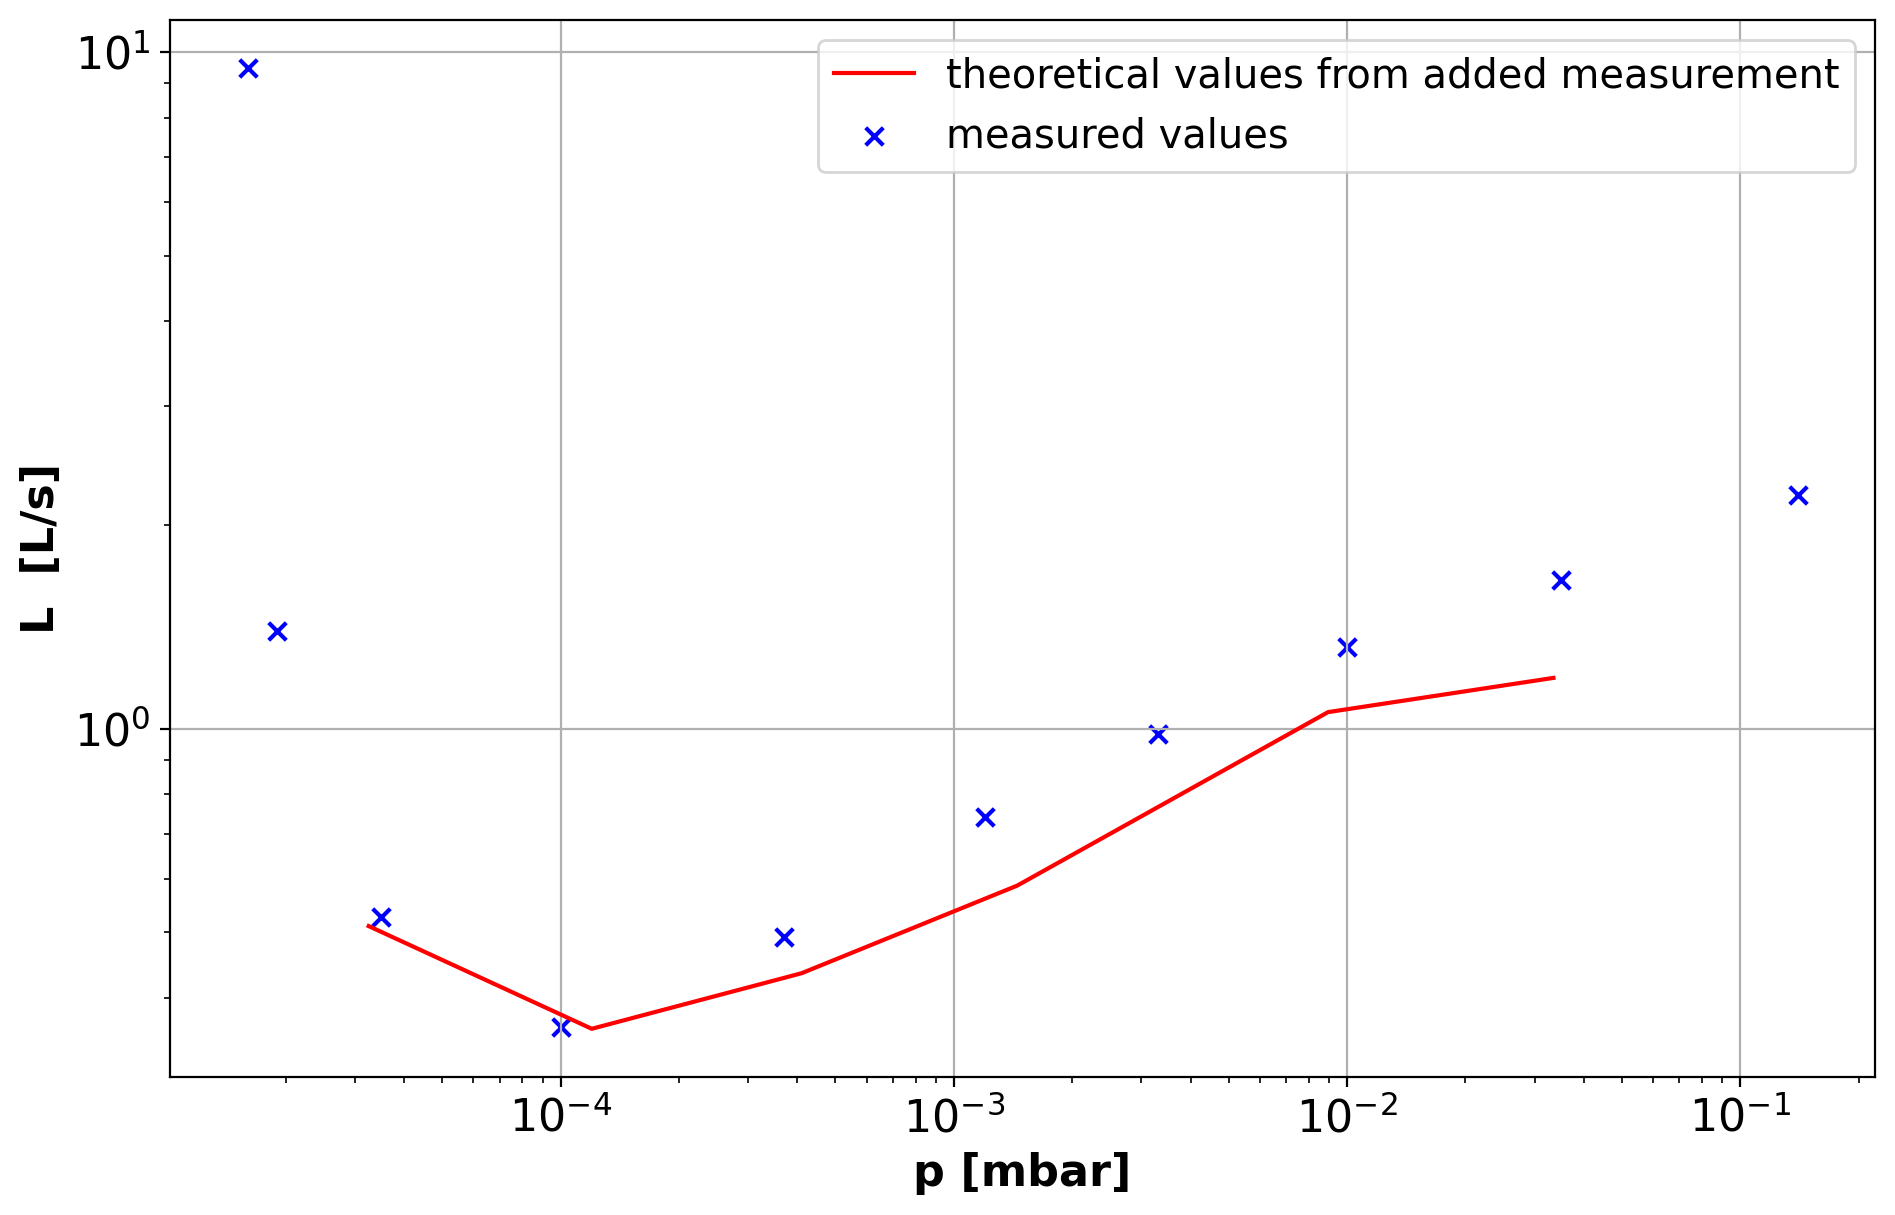

In [38]:
plt.figure(figsize=(11,7))
plt.scatter(p1_both, L_exp_both, label="measured values", marker="x", s=40, color = 'blue')
plt.plot(p_theo, L_theo_both, label="theoretical values from added measurement", color = 'red')
plt.legend(fontsize='x-large')
plt.grid(True)
#plt.title('Conductance of the pipe and aperture in series in dependancy of the chamber pressure')
plt.xlabel('p [mbar]')
plt.ylabel('L  [L/s]')
plt.xscale('log')
plt.yscale('log')

plt.savefig("series.png")